## Loading the dataset

In [1]:
from keras.datasets import cifar10
import time

cifar10_dataset = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [2]:
# len(cifar10_dataset[0][1]) - len(cifar10_dataset[1][1])

In [32]:
import tensorflow as tf
import numpy as np
tf.random.set_seed(42)
np.random.seed(42)

In [3]:
(train_data, train_labels),(X_test, y_test) = cifar10_dataset

In [4]:
import numpy as np
from keras.utils.np_utils import to_categorical

train_data = np.array([image.flatten() for image in train_data])
X_test = np.array([image.flatten() for image in X_test])

train_labels,y_test = train_labels.ravel(),y_test.ravel()

train_labels, y_test = to_categorical(train_labels), to_categorical(y_test)

In [5]:
import matplotlib.pyplot as plt

def plotLAA(hist):
    loss_list = hist.history['loss']
    accuaracy_list = hist.history['categorical_accuracy']
    val_loss_list = hist.history['val_loss']
    val_accuaracy_list = hist.history['val_categorical_accuracy']
    plt.figure(figsize=(10, 6))
    plt.subplot(2,2,1)
    plt.plot(loss_list,color='red')
    plt.title('loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.subplot(2,2,2)
    plt.plot(accuaracy_list)
    plt.title('accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.subplot(2,2,3)
    plt.plot(val_loss_list,color='red')
    plt.title('loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.subplot(2,2,4)
    plt.plot(val_accuaracy_list)
    plt.title('accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')

In [6]:
def printResult(start,end,hist):
    print(f'- Learning time = {end-start}s')
    for key,value in zip(hist.history.keys(),hist.history.values()):
        print(key,value[-1])
    plotLAA(hist)

### 1. Normalization 

In [7]:
train_data = train_data / 255
X_test = X_test / 255

### 2. The archetecture

In [8]:
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
model = Sequential([
    Dense(128,activation ='relu', input_dim = 32*32*3),
    Dense(64,activation ='relu'),
    Dense(10,activation ='softmax')
])


### 3. Data split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_validation,y_train, y_validation = train_test_split(train_data,train_labels,test_size=0.2,stratify=train_labels,random_state=7)

### 4. Train

In [10]:
from sklearn.utils import validation
model.compile(optimizer=SGD(learning_rate=0.01),loss='categorical_crossentropy',metrics=['categorical_accuracy'])
start = time.time()
mini_batch_hist = model.fit(X_train,y_train,epochs=50,batch_size = 128,validation_data = (X_validation,y_validation), verbose = 0)
end = time.time()

- Learning time = 144.33040595054626s
loss 1.2673521041870117
categorical_accuracy 0.5529500246047974
val_loss 1.4264135360717773
val_categorical_accuracy 0.503600001335144


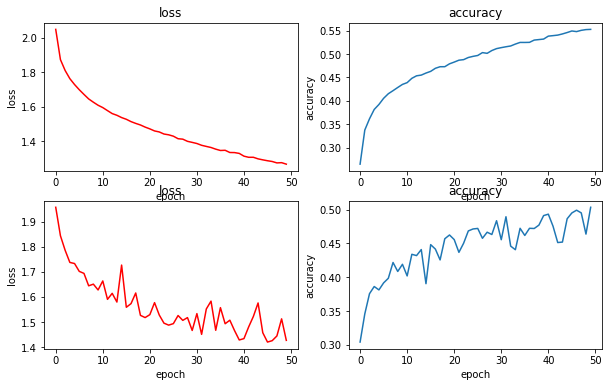

In [11]:
printResult(start,end,mini_batch_hist)

### 5. L2 norm regularization

In [12]:
from keras import regularizers
model = Sequential([
    Dense(128,activation ='relu', input_dim = 32*32*3),
    Dense(64,activation ='relu', kernel_regularizer = regularizers.l2(0.01)),
    Dense(10,activation ='softmax')
])

In [13]:
model.compile(optimizer=SGD(learning_rate=0.01),loss='categorical_crossentropy',metrics=['categorical_accuracy'])
start = time.time()
mini_batch_hist = model.fit(X_train,y_train,epochs=50,batch_size = 128,validation_data = (X_validation,y_validation), verbose = 0)
end = time.time()

- Learning time = 127.0119297504425s
loss 1.4217263460159302
categorical_accuracy 0.5188999772071838
val_loss 1.4964157342910767
val_categorical_accuracy 0.4903999865055084


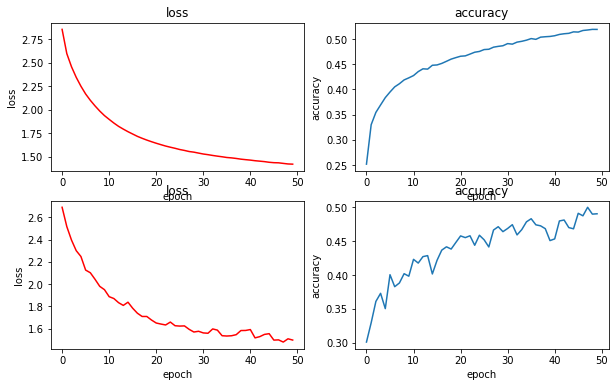

In [14]:
printResult(start,end,mini_batch_hist)

### 6.

In [15]:
from keras.layers import Dropout
def newModel(dropout_rate):
  model = Sequential([
      Dense(128,activation ='relu', input_dim = 32*32*3),
      Dense(64,activation ='relu', kernel_regularizer = regularizers.l2(0.01)),
      Dropout(dropout_rate),
      Dense(10,activation ='softmax')
  ])
  model.compile(optimizer=SGD(learning_rate=0.01),loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [16]:
def plot3Te(hist1,hist2,hist3):
    plt.figure(figsize=(10, 6))
    plt.subplot(2,2,1)
    plt.plot(hist1[0].history['loss'],label=hist1[1])
    plt.plot(hist2[0].history['loss'],label=hist2[1])
    plt.plot(hist3[0].history['loss'],label=hist3[1])
    plt.title('loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.subplot(2,2,2)
    plt.plot(hist1[0].history['categorical_accuracy'],label=hist1[1])
    plt.plot(hist2[0].history['categorical_accuracy'],label=hist2[1])
    plt.plot(hist3[0].history['categorical_accuracy'],label=hist3[1])
    plt.title('accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    
    plt.subplot(2,2,3)
    plt.plot(hist1[0].history['val_loss'],label=hist1[1])
    plt.plot(hist2[0].history['val_loss'],label=hist2[1])
    plt.plot(hist3[0].history['val_loss'],label=hist3[1])
    plt.title('val_loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.subplot(2,2,4)
    plt.plot(hist1[0].history['val_categorical_accuracy'],label=hist1[1])
    plt.plot(hist2[0].history['val_categorical_accuracy'],label=hist2[1])
    plt.plot(hist3[0].history['val_categorical_accuracy'],label=hist3[1])
    plt.title('val_accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

In [17]:
import time

newModel(0.2)
start = time.time()

mini_batch_hist1 = model.fit(X_train,y_train,epochs=50,batch_size = 128,validation_data = (X_validation,y_validation), verbose = 0)
end = time.time()


- Learning time = 142.62164545059204s
loss 1.2636051177978516
categorical_accuracy 0.5748999714851379
val_loss 1.5215682983398438
val_categorical_accuracy 0.483599990606308


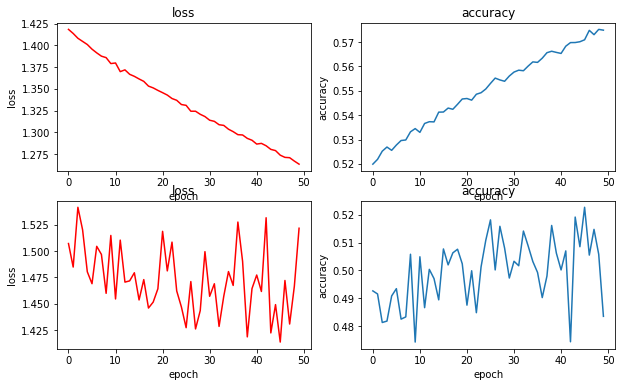

In [18]:
printResult(start,end,mini_batch_hist1)

In [19]:
newModel(0.3)
mini_batch_hist2 = model.fit(X_train,y_train,epochs=50,batch_size = 128,validation_data = (X_validation,y_validation), verbose = 0)


- Learning time = 142.62164545059204s
loss 1.1612433195114136
categorical_accuracy 0.6160249710083008
val_loss 1.397109866142273
val_categorical_accuracy 0.5331000089645386


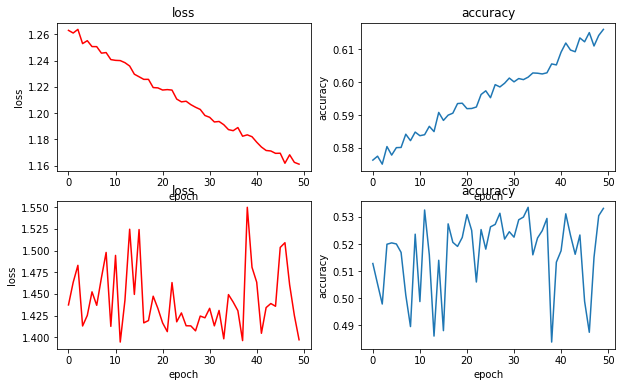

In [20]:
printResult(start,end,mini_batch_hist2)

In [21]:
newModel(0.5)
mini_batch_hist3 = model.fit(X_train,y_train,epochs=50,batch_size = 128,validation_data = (X_validation,y_validation), verbose = 0)


- Learning time = 142.62164545059204s
loss 1.0724022388458252
categorical_accuracy 0.6490749716758728
val_loss 1.5831491947174072
val_categorical_accuracy 0.49239999055862427


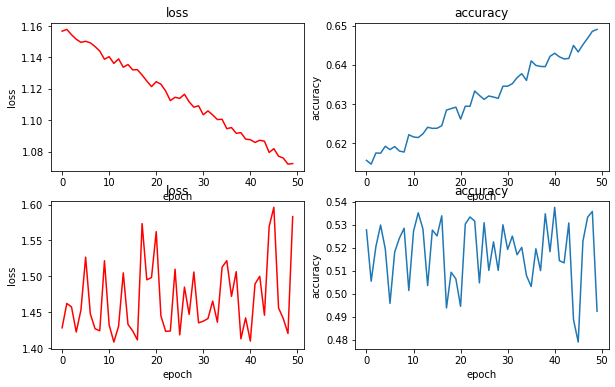

In [22]:
printResult(start,end,mini_batch_hist3)

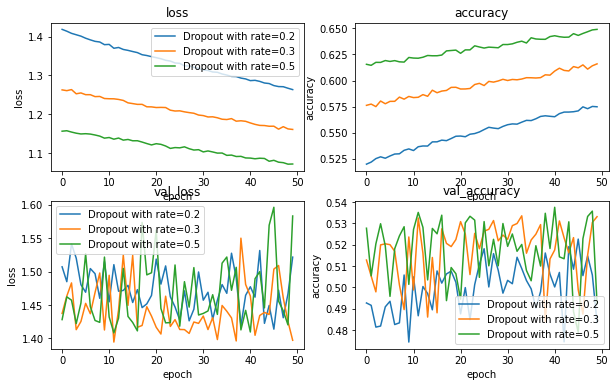

In [23]:
plot3Te((mini_batch_hist1,'Dropout with rate=0.2'),(mini_batch_hist2,'Dropout with rate=0.3'),(mini_batch_hist3,'Dropout with rate=0.5'))

7.

In [24]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience = 4)
start = time.time()
mini_batch_hist = model.fit(X_train,y_train,epochs=50,batch_size = 128,validation_data = (X_validation,y_validation), callbacks = early_stopping, verbose = 1)
end = time.time()


Epoch 1/50
313/313 [==============================] - 3s 10ms/step - loss: 1.0742 - categorical_accuracy: 0.6475 - val_loss: 1.4928 - val_categorical_accuracy: 0.5117
Epoch 2/50
313/313 [==============================] - 2s 8ms/step - loss: 1.0658 - categorical_accuracy: 0.6511 - val_loss: 1.5347 - val_categorical_accuracy: 0.5021
Epoch 3/50
313/313 [==============================] - 2s 8ms/step - loss: 1.0672 - categorical_accuracy: 0.6475 - val_loss: 1.4426 - val_categorical_accuracy: 0.5357
Epoch 4/50
313/313 [==============================] - 3s 9ms/step - loss: 1.0659 - categorical_accuracy: 0.6498 - val_loss: 1.4786 - val_categorical_accuracy: 0.5200
Epoch 5/50
313/313 [==============================] - 4s 14ms/step - loss: 1.0621 - categorical_accuracy: 0.6523 - val_loss: 1.4299 - val_categorical_accuracy: 0.5335
Epoch 6/50
313/313 [==============================] - 2s 8ms/step - loss: 1.0683 - categorical_accuracy: 0.6479 - val_loss: 1.4468 - val_categorical_accuracy: 0.5253
Ep

- Learning time = 39.162296772003174s
loss 1.053968071937561
categorical_accuracy 0.6542999744415283
val_loss 1.4645949602127075
val_categorical_accuracy 0.519599974155426


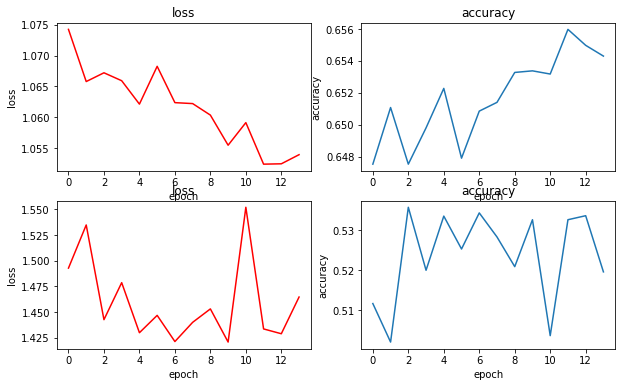

In [25]:
printResult(start,end,mini_batch_hist)

### 8.

In [26]:
from keras.layers import BatchNormalization

model = Sequential([
      Dense(128,activation ='relu', input_dim = 32*32*3),
      BatchNormalization(),
      Dense(64,activation ='relu', kernel_regularizer = regularizers.l2(0.01)),
      # BatchNormalization(),
      Dropout(0.5),
      Dense(10,activation ='softmax')
  ])
model.compile(optimizer=SGD(learning_rate=0.01),loss='categorical_crossentropy',metrics=['categorical_accuracy'])
start = time.time()
mini_batch_hist = model.fit(X_train,y_train,epochs=50,batch_size = 128,validation_data = (X_validation,y_validation), callbacks = early_stopping, verbose = 0)
end = time.time()


- Learning time = 128.00965309143066s
loss 1.4117203950881958
categorical_accuracy 0.5169000029563904
val_loss 1.4928909540176392
val_categorical_accuracy 0.48660001158714294


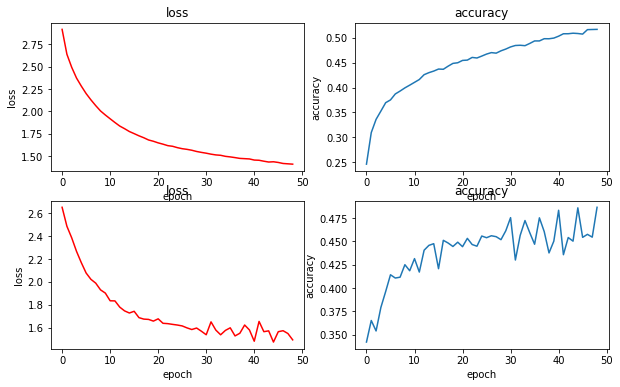

In [27]:
printResult(start,end,mini_batch_hist)

### 9.

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from scipy.stats import uniform
from keras.wrappers.scikit_learn import KerasClassifier

def create_model(learning_rate=0.01, dropout_rate=0.0):
    model = Sequential([
      Dense(128,activation ='relu', input_dim = 32*32*3),
      BatchNormalization(),
      Dense(64,activation ='relu', kernel_regularizer = regularizers.l2(0.01)),
      Dropout(dropout_rate),
      Dense(10,activation ='softmax')
    ])
    model.compile(optimizer=SGD(learning_rate),loss='categorical_crossentropy',metrics=['categorical_accuracy'])
    return model

params = {
    'learning_rate': uniform(0.0001, 0.1),
    'dropout_rate': uniform(0.1, 0.5),
    'batch_size': [16, 32, 64, 128]
}
keras_model = KerasClassifier(build_fn=create_model)

random_search = RandomizedSearchCV(
    estimator=keras_model,
    param_distributions=params,
    n_iter=10,
    cv=3,
    verbose=0,
    random_state=7,
    n_jobs=-1,
    scoring='accuracy'
)

random_search.fit(X_train, y_train)

print('Best score:', random_search.best_score_)
print('Best params:', random_search.best_params_)


<ipython-input-28-9486e1777894>:24: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_model = KerasClassifier(build_fn=create_model)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


313/313 [==============================] - 3s 7ms/step - loss: 2.5930 - categorical_accuracy: 0.3251
Best score: nan
Best params: {'batch_size': 128, 'dropout_rate': 0.2136695399132326, 'learning_rate': 0.03199722257734033}


In [33]:
model = Sequential([
      Dense(128,activation ='relu', input_dim = 32*32*3),
      BatchNormalization(),
      Dense(64,activation ='relu', kernel_regularizer = regularizers.l2(0.01)),
      Dropout(0.2),
      Dense(10,activation ='softmax')
    ])
model.compile(optimizer=SGD(learning_rate = 0.03),loss='categorical_crossentropy',metrics=['categorical_accuracy'],)
start = time.time()
mini_batch_hist = model.fit(X_train,y_train,epochs=50,batch_size = 128,validation_data = (X_validation,y_validation), verbose = 0)
end = time.time()

- Learning time = 185.91512084007263s
loss 1.676550030708313
categorical_accuracy 0.4160749912261963
val_loss 1.6687158346176147
val_categorical_accuracy 0.41769999265670776


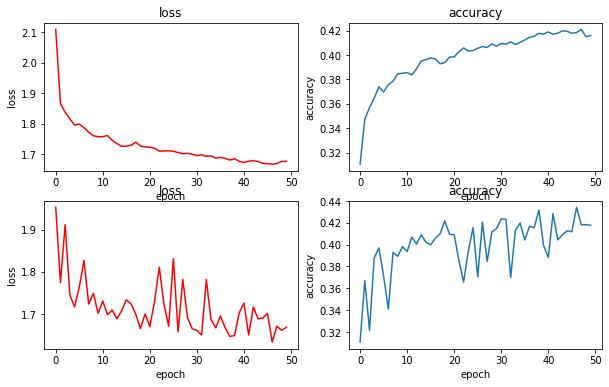

In [30]:
printResult(start,end,mini_batch_hist)